In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import itertools
import numpy as np
import utils

from collections import defaultdict as ddict
from sklearn.metrics import confusion_matrix, f1_score
from matplotlib import pyplot as plt
from random import choices

In [3]:
sd_path = "../scores_dicts/abs.pkl"
sd = utils.get_pickle(sd_path)

# Data exploration

In [4]:
sd.keys()
len(sd)

dict_keys([5912, 11343, 5626, 3172, 5025, 5257, 11049, 19, 10563, 11355, 6784, 8613, 5099, 1521, 5231, 4043, 11351, 10721, 10595, 3152, 7058, 4725, 2292, 9605, 1273, 9393, 4303, 10537, 8334, 1890, 9781, 6564, 5576, 9825, 9502, 6731, 5635, 9086, 9555, 10680, 5075, 9590, 10231, 6714, 5244, 3789, 3621, 11264, 5420, 7535, 10586, 1153, 6048, 8815, 5272, 1492, 10542, 4637, 307, 7584, 7823, 5243, 1573, 3583, 10325, 6094, 1944, 9709, 5524, 7910, 8565, 6329, 5334, 2736, 7626, 1017, 7174, 5357, 7397, 1173, 8997, 9325, 2748, 2065, 8054, 7547, 5476, 6976, 9221, 7770, 8001, 10368, 10824, 3906, 8306, 7670, 8312, 5558, 6774, 4315])

100

In [5]:
sd[7823]['system_summaries']

{'presumm_out_trans_abs.txt': {'system_summary': '<t> drivers pulled over on interstate 20 in albilene , texas , got out of their cars and walked toward oncoming traffic to pick up the cash </t>  <t> a video posted on facebook shows motorists grabbing the notes in between stopped vehicles , while others were forced to slow down and veer out of the way </t>  <t> police have warned that if anyone is caught with cash that was inside the truck - they could land themselves behind bars </t>',
  'scores': {'rouge_1_f_score': 0.5042,
   'rouge_2_recall': 0.26087,
   'rouge_l_recall': 0.55319,
   'rouge_2_precision': 0.16901,
   'rouge_2_f_score': 0.20513,
   'rouge_1_precision': 0.41667,
   'rouge_1_recall': 0.6383,
   'rouge_l_precision': 0.36111,
   'rouge_l_f_score': 0.43697,
   'js-2': -0.5409531269947896,
   'mover_score': 0.34723133690760255,
   'bert_recall_score': 0.46336546540260315,
   'bert_precision_score': 0.33870336413383484,
   'bert_f_score': 0.4012831151485443,
   'litepyramid

### print score ranges

In [6]:
utils.print_score_ranges(sd)

                            min    25-perc     median    75-perc        max       mean
--------------------  ---------  ---------  ---------  ---------  ---------  ---------
bert_f_score          -0.204646   0.183533   0.273075   0.361779   0.777841   0.272246
bert_precision_score  -0.236365   0.155290   0.240984   0.349462   0.837540   0.252681
bert_recall_score     -0.298603   0.191222   0.293298   0.390441   0.843621   0.290956
js-2                  -0.693147  -0.611212  -0.561098  -0.501344  -0.202109  -0.549249
litepyramid_recall     0.000000   0.250000   0.428571   0.600000   1.000000   0.428001
mover_score            0.008218   0.222853   0.275872   0.337848   0.720593   0.283519
rouge_1_f_score        0.123460   0.360270   0.431370   0.508147   0.857140   0.436647
rouge_1_precision      0.101690   0.328120   0.400000   0.491928   0.941180   0.415695
rouge_1_recall         0.097560   0.381365   0.474790   0.583330   0.940000   0.483694
rouge_2_f_score        0.000000   0.114635 

## how many summaries per document?

In [7]:
print(np.mean([len(d['system_summaries']) for d in sd.values()]))

15.0


In [8]:
len(sd)

100

## what metrics found for each document?

In [9]:
mlist = utils.get_metrics_list(sd)
mlist

['bert_f_score',
 'bert_precision_score',
 'bert_recall_score',
 'js-2',
 'litepyramid_recall',
 'mover_score',
 'rouge_1_f_score',
 'rouge_1_precision',
 'rouge_1_recall',
 'rouge_2_f_score',
 'rouge_2_precision',
 'rouge_2_recall',
 'rouge_l_f_score',
 'rouge_l_precision',
 'rouge_l_recall']

## Filter out some metrics if reqd

In [10]:
mlist = ['bert_recall_score', 'mover_score', 'rouge_1_recall', 'rouge_2_recall', 'rouge_l_recall', 'js-2', 
         'litepyramid_recall']

# Write to william's test format - Exp I
The below lines writes our data in the appropriate format for william's test. To run william's test see https://github.com/ygraham/nlp-williams

In [11]:
W_DATAPATH = "../williams_test_data/"
human_scores_fp = W_DATAPATH + 'abs_human_scores_100_docs_15_sys_clean.tsv'
metric_scores_fp = W_DATAPATH + 'abs_metric_scores_100_docs_15_sys_clean.tsv'

In [12]:
header = 'METRIC\tLP\tTESTSET\tSYSTEM\tSCORE'

In [13]:
systems = utils.get_system_level_scores(sd, mlist, agg='mean')
len(systems)

15

In [14]:
systems

defaultdict(<function utils.get_system_level_scores.<locals>.<lambda>()>,
            {'presumm_out_trans_abs.txt': defaultdict(list,
                         {'bert_recall_score': 0.23639445294509642,
                          'mover_score': 0.2514619151726886,
                          'rouge_1_recall': 0.4734307,
                          'rouge_2_recall': 0.19209669999999998,
                          'rouge_l_recall': 0.43200049999999995,
                          'js-2': -0.5748483871399386,
                          'litepyramid_recall': 0.37413331113331116}),
             'two_stage_rl_out.txt': defaultdict(list,
                         {'bert_recall_score': 0.302131678191945,
                          'mover_score': 0.28243861098086226,
                          'rouge_1_recall': 0.4714949,
                          'rouge_2_recall': 0.219752,
                          'rouge_l_recall': 0.44207499999999994,
                          'js-2': -0.5486914060570224,
              

In [15]:
with open(human_scores_fp, 'w') as f:
    f.write(header + '\n')
    for sys_name in systems:
        _ = f.write(f"HUMAN\ten-en\tcnndm\t{sys_name}\t{systems[sys_name]['litepyramid_recall']}\n")

31

In [16]:
with open(metric_scores_fp, 'w') as f:
    f.write(header + '\n')
    for m in mlist:
        if m == 'litepyramid_recall':
            continue
        for sys_name in systems:
            _ = f.write(f"{m}\ten-en\tcnndm\t{sys_name}\t{systems[sys_name][m]}\n")

31

# System level analysis - Exp II

Text(0.5, 0, 'top k systems according to litepyramid_recall')

Text(0, 0.5, 'kendalltau correlation between different metric pairs')

(-1, 1)

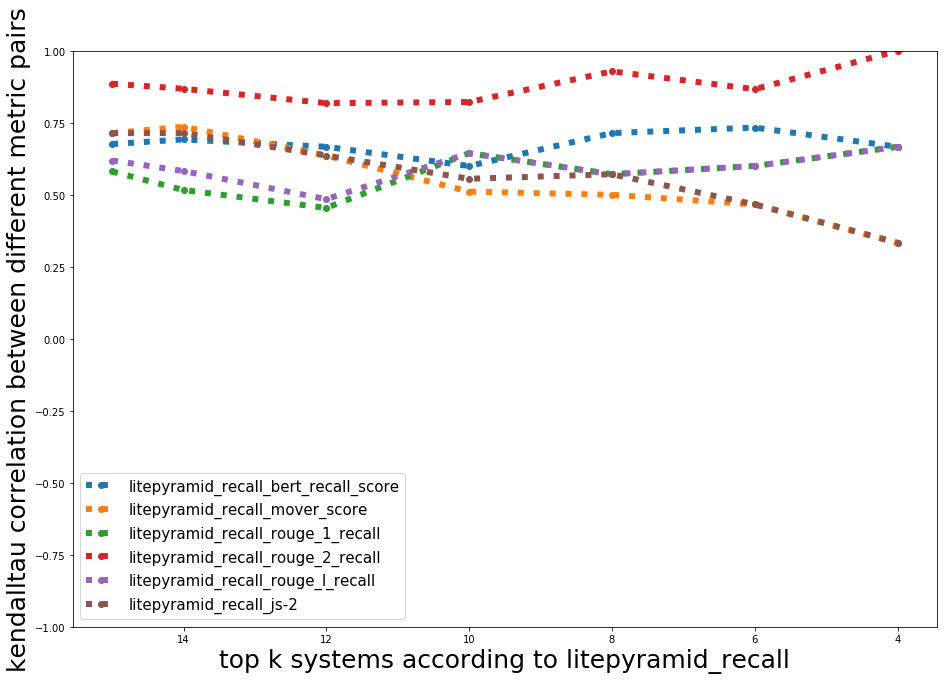

In [17]:
# plot k vs disagreements
kvalues = [15, 14, 12, 10, 8, 6, 4]
all_pairs = [('litepyramid_recall', m) for m in mlist if m != 'litepyramid_recall']
systems = utils.get_system_level_scores(sd, mlist, agg='mean')
sorting_metric = 'litepyramid_recall'
correlation_method = 'kendalltau'

y = ddict(list)
for k in kvalues:
    top_ksystems = utils.get_topk(systems, k, metric=sorting_metric)
    corr, pval = utils.get_correlation(top_ksystems, metric_pairs=all_pairs, method=correlation_method)
    for key in corr:
        y[key].append(corr[key])
        
data = {
    'x': kvalues,
    **y,
}
labels = list(y.keys())

ax = plt.axes([0, 0, 2, 2])
lines = []
for label in labels:
    lines.append(ax.plot('x', label, data=data, linewidth=6.0, marker='o',
                         linestyle=':' if 'pyramid' in label else None))
plt.gca().invert_xaxis()
ax.legend(prop={'size': 15})
ax.set_xlabel(f"top k systems according to {sorting_metric}", fontsize=25)
ax.set_ylabel(f"{correlation_method} correlation between different metric pairs", fontsize=25)
plt.ylim(-1, 1)

# Bootstrap Resampling - Exp III

In [18]:
systems = utils.get_system_level_scores(sd, mlist, agg='none')
sys_names = list(systems.keys())
all_system_pairs = list(itertools.combinations(sys_names, 2))

In [19]:
def get_predictions_br(system_pairs, systems, metric):
    preds = {}
    for pair in system_pairs:
        sys1 = systems[pair[0]][metric]
        sys2 = systems[pair[1]][metric]
        n = len(sys1)
        points = [i for i in range(0, n)]
        is_better = 0
        for i in range(1000):
            sample = choices(points, k=n)
            sys1_ = [sys1[p] for p in sample]
            sys2_ = [sys2[p] for p in sample]
            if np.mean(sys1_) > np.mean(sys2_):
                is_better += 1
                
        if is_better/1000 >= 0.95:
            preds[pair] = 0 # pair[0] is better
        elif is_better/1000 <= 0.05:
            preds[pair] = 1 # pair[1] is better
        else:
            preds[pair] = 2 # can't say
    return preds

In [20]:
human_judgements = get_predictions_br(all_system_pairs, systems, 'litepyramid_recall')

In [21]:
y_true = [human_judgements[pair] for pair in all_system_pairs]
metrics = mlist
for metric in metrics:
    metric_predictions = get_predictions_br(all_system_pairs, systems, metric)
    
    y_pred = [metric_predictions[pair] for pair in all_system_pairs]
#     print('confusion metrics ', metric)
    print(confusion_matrix(y_true, y_pred))
    print(metric, f1_score(y_true, y_pred, average='weighted'))

[[16  2  7]
 [ 1 39  3]
 [ 6 15 16]]
bert_recall_score 0.6603724318010031
[[18  2  5]
 [ 1 35  7]
 [10 10 17]]
mover_score 0.6587782587782587
[[21  0  4]
 [ 0 33 10]
 [10  8 19]]
rouge_1_recall 0.6916326530612246
[[21  0  4]
 [ 0 36  7]
 [ 4  4 29]]
rouge_2_recall 0.8206793779943522
[[21  1  3]
 [ 0 34  9]
 [ 9  9 19]]
rouge_l_recall 0.6988245245851735
[[20  0  5]
 [ 1 33  9]
 [ 8  6 23]]
js-2 0.7250311868198047
[[24  0  1]
 [ 0 41  2]
 [ 0  1 36]]
litepyramid_recall 0.9621407660808685


# Summary level analysis - Exp IV

In [22]:
np.set_printoptions(precision=4)

In [23]:
metrics = mlist
utils.print_ktau_matrix(metrics, percentile=[(0, 100)], sd=sd, cutoff_metric='litepyramid_recall', y_type='ktau')

['bert_recall_score', 'mover_score', 'rouge_1_recall', 'rouge_2_recall', 'rouge_l_recall', 'js-2', 'litepyramid_recall']
[[0.     0.5745 0.6153 0.6334 0.6067 0.5462 0.5784]]

[[0.     0.     0.5488 0.5985 0.5539 0.6255 0.5553]]

[[0.     0.     0.     0.6882 0.8382 0.5659 0.6247]]

[[0.     0.     0.     0.     0.6888 0.7548 0.608 ]]

[[0.     0.     0.     0.     0.     0.5678 0.6003]]

[[0.     0.     0.     0.     0.     0.     0.5575]]

[[0. 0. 0. 0. 0. 0. 0.]]

total 512/2100.0 = 24.38095238095238% values ignored


[0.5784123792845655,
 0.5552767596654832,
 0.6246998507411019,
 0.6079667192345886,
 0.6002859634413781,
 0.5574888346248479]